In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
import os
import xgboost as xgb
%matplotlib inline

/Users/rezarad/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv("/Users/andrewrubino/Desktop/train.csv", parse_dates = ['timestamp']).drop('id', axis=1)
print train.shape
test = pd.read_csv("/Users/andrewrubino/Desktop/test.csv", parse_dates = ['timestamp']).drop('id', axis=1)
print test.shape
macro = pd.read_csv("/Users/andrewrubino/Desktop/macro.csv", parse_dates = ['timestamp'])
print macro.shape

In [4]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [566]:
np.sum(train.isnull())

price_doc                         0
timestamp                         0
full_sq                           0
life_sq                           0
floor                             0
max_floor                         0
material                          0
build_year                        0
num_room                          0
kitch_sq                          0
state                             0
product_type                      0
sub_area                          0
indust_part                       0
school_education_centers_raion    0
sport_objects_raion               0
culture_objects_top_25_raion      0
oil_chemistry_raion               0
metro_min_avto                    0
green_zone_km                     0
industrial_km                     0
kremlin_km                        0
radiation_km                      0
ts_km                             0
fitness_km                        0
stadium_km                        0
additional_education_km           0
cafe_count_1500_price_500   

In [480]:
ftr_train = train.loc[:, ['price_doc',
'timestamp',
'full_sq',
'life_sq',
'floor',
'max_floor',
'material',
'build_year',
'num_room',
'kitch_sq',
'state',
'product_type',
'sub_area',
'indust_part',
'school_education_centers_raion',
'sport_objects_raion',
'culture_objects_top_25_raion',
'oil_chemistry_raion',
'metro_min_avto',
'green_zone_km',
'industrial_km',
'kremlin_km',
'radiation_km',
'ts_km',
'fitness_km',
'stadium_km',
'additional_education_km',
'cafe_count_1500_price_500',
'cafe_count_1500_price_high',
'cafe_count_2000_price_2500',
'trc_sqm_5000',
'cafe_count_5000',
'cafe_count_5000_price_high']]


ftr_test = test.loc[:, ['timestamp',
'full_sq',
'life_sq',
'floor',
'max_floor',
'material',
'build_year',
'num_room',
'kitch_sq',
'state',
'product_type',
'sub_area',
'indust_part',
'school_education_centers_raion',
'sport_objects_raion',
'culture_objects_top_25_raion',
'oil_chemistry_raion',
'metro_min_avto',
'green_zone_km',
'industrial_km',
'kremlin_km',
'radiation_km',
'ts_km',
'fitness_km',
'stadium_km',
'additional_education_km',
'cafe_count_1500_price_500',
'cafe_count_1500_price_high',
'cafe_count_2000_price_2500',
'trc_sqm_5000',
'cafe_count_5000',
'cafe_count_5000_price_high']]

ftr_macro = macro.loc[:,['timestamp',
'oil_urals',
'gdp_quart',
'cpi',
'ppi',
'usdrub',
'eurrub',
'gdp_annual',
'rts',
'micex',
'micex_cbi_tr',
'deposits_rate',
'mortgage_rate',
'income_per_cap',
'salary',
'labor_force',
'unemployment',
'employment']]

In [481]:
train = pd.merge(ftr_train, ftr_macro, how = 'left', on = 'timestamp')
test = pd.merge(ftr_test, ftr_macro, how = 'left', on = 'timestamp')

In [482]:
print train.shape
print test.shape

(30471, 50)
(7662, 49)


In [483]:
#train.to_csv('sberbank_train_unclean.csv')

In [484]:
#test.to_csv('sberbank_test_unclean.csv')

In [485]:
train.apply(lambda x: type(x[0]))

price_doc                                             <type 'int'>
timestamp                         <class 'pandas.tslib.Timestamp'>
full_sq                                               <type 'int'>
life_sq                                             <type 'float'>
floor                                               <type 'float'>
max_floor                                           <type 'float'>
material                                            <type 'float'>
build_year                                          <type 'float'>
num_room                                            <type 'float'>
kitch_sq                                            <type 'float'>
state                                               <type 'float'>
product_type                                          <type 'str'>
sub_area                                              <type 'str'>
indust_part                                         <type 'float'>
school_education_centers_raion                        <type 'i

In [486]:
test.apply(lambda x: type(x[0]))

timestamp                         <class 'pandas.tslib.Timestamp'>
full_sq                                             <type 'float'>
life_sq                                             <type 'float'>
floor                                                 <type 'int'>
max_floor                                             <type 'int'>
material                                              <type 'int'>
build_year                                          <type 'float'>
num_room                                              <type 'int'>
kitch_sq                                            <type 'float'>
state                                               <type 'float'>
product_type                                          <type 'str'>
sub_area                                              <type 'str'>
indust_part                                         <type 'float'>
school_education_centers_raion                        <type 'int'>
sport_objects_raion                                   <type 'i

In [563]:
np.sum(train.isnull())

price_doc                         0
timestamp                         0
full_sq                           0
life_sq                           0
floor                             0
max_floor                         0
material                          0
build_year                        0
num_room                          0
kitch_sq                          0
state                             0
product_type                      0
sub_area                          0
indust_part                       0
school_education_centers_raion    0
sport_objects_raion               0
culture_objects_top_25_raion      0
oil_chemistry_raion               0
metro_min_avto                    0
green_zone_km                     0
industrial_km                     0
kremlin_km                        0
radiation_km                      0
ts_km                             0
fitness_km                        0
stadium_km                        0
additional_education_km           0
cafe_count_1500_price_500   

In [488]:
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import LabelEncoder

def encode_object_features(train_df, test_df):
    '''(DataFrame, DataFrame) -> DataFrame, DataFrame
    
    Will encode each non-numerical column.
    '''
    for f in train_df.columns:
        if train_df[f].dtype=='object':
            print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train_df[f].values.astype('str')) + list(test_df[f].values.astype('str')))
            train_df[f] = lbl.transform(list(train_df[f].values.astype('str')))
            test_df[f] = lbl.transform(list(test_df[f].values.astype('str')))
    
    return train_df, test_df

In [489]:
train, test = encode_object_features(train, test)

product_type
sub_area
oil_chemistry_raion


In [490]:
# Impute missing values in training set

from scipy.stats import mode

print int(mode(train['life_sq']).mode[0])
print mode(train['floor']).mode[0]
print mode(train['max_floor']).mode[0]
print mode(train['material']).mode[0]
print mode(train['build_year']).mode[0]
print mode(train['num_room']).mode[0]
print mode(train['kitch_sq']).mode[0]
print mode(train['state']).mode[0]
print mode(train['industrial_km']).mode[0]


train['life_sq'].fillna(mode(train['life_sq']).mode[0], inplace=True)
train['floor'].fillna(mode(train['floor']).mode[0], inplace=True)
train['max_floor'].fillna(mode(train['max_floor']).mode[0], inplace=True)
train['material'].fillna(mode(train['material']).mode[0], inplace=True)
train['build_year'].fillna(mode(train['build_year']).mode[0], inplace=True)
train['num_room'].fillna(mode(train['num_room']).mode[0], inplace=True)
train['kitch_sq'].fillna(mode(train['kitch_sq']).mode[0], inplace=True)
train['state'].fillna(mode(train['state']).mode[0], inplace=True)
train['industrial_km'].fillna(mode(train['industrial_km']).mode[0], inplace=True)

19
3.0
17.0
1.0
2014.0
2.0
1.0
2.0
0.394107795


In [567]:
print test.shape
np.sum(test.isnull())

(7662, 59)


timestamp                         0
full_sq                           0
life_sq                           0
floor                             0
max_floor                         0
material                          0
build_year                        0
num_room                          0
kitch_sq                          0
state                             0
product_type                      0
sub_area                          0
indust_part                       0
school_education_centers_raion    0
sport_objects_raion               0
culture_objects_top_25_raion      0
oil_chemistry_raion               0
metro_min_avto                    0
green_zone_km                     0
industrial_km                     0
kremlin_km                        0
radiation_km                      0
ts_km                             0
fitness_km                        0
stadium_km                        0
additional_education_km           0
cafe_count_1500_price_500         0
cafe_count_1500_price_high  

In [492]:
# Impute missing values in test set
print mode(test['life_sq']).mode[0]
print mode(test['build_year']).mode[0]
print mode(test['state']).mode[0]
print mode(test['income_per_cap']).mode[0]
print mode(test['salary']).mode[0]
print mode(test['labor_force']).mode[0]
print mode(test['unemployment']).mode[0]
print mode(test['employment']).mode[0]


test['life_sq'].fillna(mode(test['life_sq']).mode[0], inplace=True)
test['build_year'].fillna(mode(test['build_year']).mode[0], inplace=True)
test['state'].fillna(mode(test['state']).mode[0], inplace=True)
test['income_per_cap'].fillna(mode(test['income_per_cap']).mode[0], inplace=True)
test['salary'].fillna(mode(test['salary']).mode[0], inplace=True)
test['labor_force'].fillna(mode(test['labor_force']).mode[0], inplace=True)
test['unemployment'].fillna(mode(test['unemployment']).mode[0], inplace=True)
test['employment'].fillna(mode(test['employment']).mode[0], inplace=True)

1.0
2017.0
2.0
102709.0
64310.0
7067.470079
0.017708287
0.733598301


In [493]:
# Do stuff with the date
def add_date_features(df):
    '''(DataFrame) -> DataFrame
    
    Will add some specific columns based on the date
    of the sale.
    '''
    #Convert to datetime to make extraction easier
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    #Extract features
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['year'] = df['timestamp'].dt.year
    
    #These features inspired by Bruno's Notebook at https://www.kaggle.com/bguberfain/naive-xgb-lb-0-317
    #Month-Year
    df['year_month'] = df['timestamp'].apply(lambda x:x.strftime('%Y%m'))
    #Week-Year
    #df['week_year'] = df['timestamp'].dt.weekofyear
    #df.drop('timestamp', axis=1, inplace=True)
    return df

In [494]:
train = add_date_features(train)
test = add_date_features(test)

In [495]:
np.log(train[[0]])

,price_doc
0,15.581952
1,15.607270
2,15.555977
3,16.388123
4,16.608603
5,16.023785
6,15.520259
7,14.508658
8,15.483217
9,14.508658


In [496]:
train.shape

(30471, 54)

In [550]:
test.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,oil_urals_x,gdp_quart,cpi,ppi,usdrub_x,eurrub,gdp_annual,rts,micex,micex_cbi_tr,deposits_rate,mortgage_rate,income_per_cap,salary,labor_force_x,unemployment,employment,month,day,year,year_month,oil_urals_y,usdrub_y,labor_force_y,delta_oil,delta_usdrub,delta_labor_force
0,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,0.041116,13,13,0,0,1.258957,0.061485,1.205404,24.779082,6.620081,8.824060,0.225788,20.392427,0.514211,0,0,0,299166,19,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-01,79.2,1.0,8,17,1,0.0,3,1.0,1.0,1,103,0.007122,0,0,0,0,4.230425,0.000000,0.742377,21.722620,8.545593,3.654955,1.313180,13.445121,1.694967,0,0,1,231300,20,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,0.225825,7,13,0,1,1.585306,0.580638,0.900408,10.320728,0.826743,3.290966,0.966254,1.464174,2.330995,6,0,2,1024431,179,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,105,0.017647,0,0,0,0,7.931398,0.025446,0.466738,26.960463,9.434351,10.480798,4.480234,18.560234,0.403429,1,0,0,0,5,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,1,103,0.007122,0,0,0,0,2.152792,0.427248,0.353642,21.905792,9.036942,3.729416,1.519553,13.898607,1.339078,0,0,1,201300,20,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN,NaN,NaN,NaN


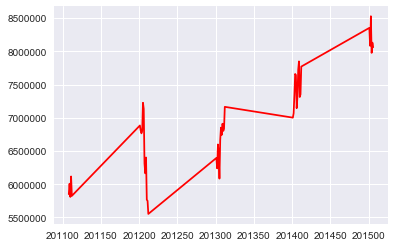

In [498]:
# I wanna add some lag features to take into account the time series dependencies in the model
price_train = train.groupby('year_month')[['price_doc']].mean()
plt.plot(price_train.index, price_train['price_doc'], color = 'r')

In [499]:
# I wanna add some lag features to take into account the time series dependencies in the model
eurrub_train = train.groupby('year_month')[['eurrub']].mean()
eurrub_test = test.groupby('year_month')[['eurrub']].mean()

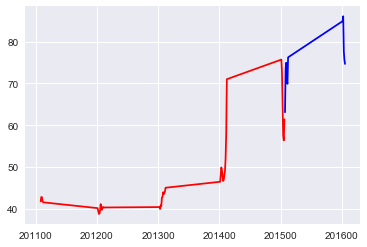

In [519]:
plt.plot(eurrub_train.index, eurrub_train['eurrub'], color = 'r')
plt.plot(eurrub_test.index, eurrub_test['eurrub'], color = 'b')

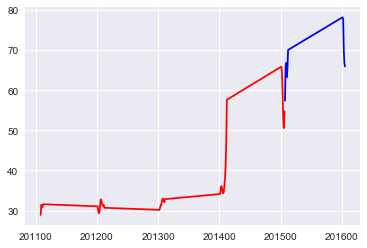

In [520]:
usdrub_train = train.groupby('year_month')[['usdrub']].mean()
usdrub_test = test.groupby('year_month')[['usdrub']].mean()

plt.plot(usdrub_train.index, usdrub_train['usdrub'], color = 'r')
plt.plot(usdrub_test.index, usdrub_test['usdrub'], color = 'b')

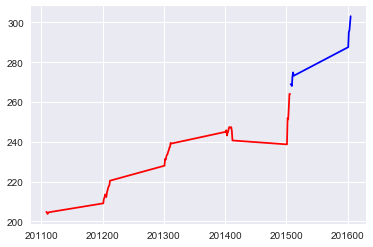

In [521]:
micex_train = train.groupby('year_month')[['micex_cbi_tr']].mean()
micex_test = test.groupby('year_month')[['micex_cbi_tr']].mean()

plt.plot(micex_train.index, micex_train['micex_cbi_tr'], color = 'r')
plt.plot(micex_test.index, micex_test['micex_cbi_tr'], color = 'b')

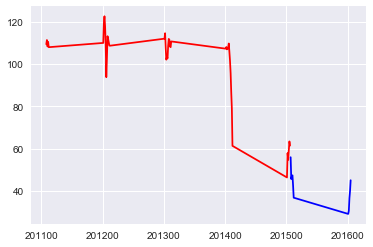

In [522]:
oil_train = train.groupby('year_month')[['oil_urals']].mean()
oil_test = test.groupby('year_month')[['oil_urals']].mean()

plt.plot(oil_train.index, oil_train['oil_urals'], color = 'r')
plt.plot(oil_test.index, oil_test['oil_urals'], color = 'b')

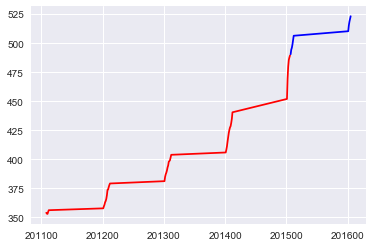

In [523]:
inflation_train = train.groupby('year_month')[['cpi']].mean()
inflation_test = test.groupby('year_month')[['cpi']].mean()

plt.plot(inflation_train.index, inflation_train['cpi'], color = 'r')
plt.plot(inflation_test.index, inflation_test['cpi'], color = 'b')

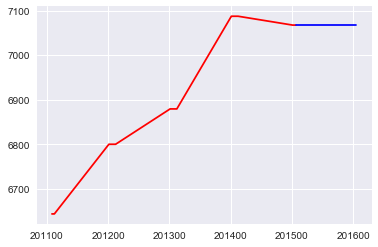

In [524]:
labor_train = train.groupby('year_month')[['labor_force']].mean()
labor_test = test.groupby('year_month')[['labor_force']].mean()

plt.plot(labor_train.index, labor_train['labor_force'], color = 'r')
plt.plot(labor_test.index, labor_test['labor_force'], color = 'b')

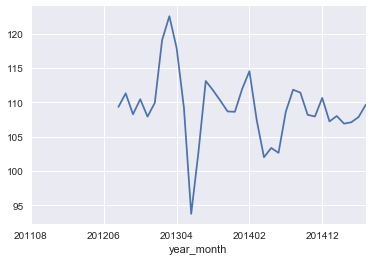

In [525]:
# Oil Urals Lag
from pandas import Series
x = train.groupby('year_month')['oil_urals'].mean()
# type(x)
differenced = x.shift(12)
# trim off the first year of empty data
#differenced = differenced[12:]
# plot differenced dataset
#print x.head(20)
#print differenced.head(20)
differenced.plot()

In [526]:
differenced.shift(12)

year_month
201108       NaN
201109       NaN
201110       NaN
201111       NaN
201112       NaN
201201       NaN
201202       NaN
201203       NaN
201204       NaN
201205       NaN
201206       NaN
201207       NaN
201208       NaN
201209       NaN
201210       NaN
201211       NaN
201212       NaN
201301       NaN
201302       NaN
201303       NaN
201304       NaN
201305       NaN
201306       NaN
201307       NaN
201308    109.31
201309    111.29
201310    108.24
201311    110.43
201312    107.90
201401    109.91
201402    119.03
201403    122.52
201404    117.87
201405    109.20
201406     93.74
201407    102.78
201408    113.09
201409    111.73
201410    110.23
201411    108.65
201412    108.60
201501    111.92
201502    114.51
201503    107.40
201504    101.99
201505    103.34
201506    102.62
Name: oil_urals, dtype: float64

<class 'pandas.core.series.Series'>


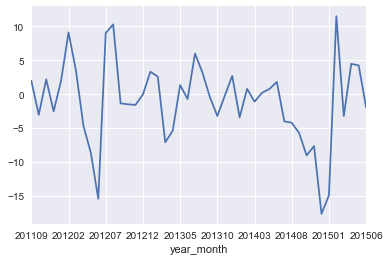

In [527]:
# Oil Urals Lag
from pandas import Series
x_1 = train.groupby('year_month')['oil_urals'].mean()
# type(x)
differenced = x_1.diff(1)
# trim off the first year of empty data
differenced = differenced[1:]
# plot differenced dataset
print type(x_1)
differenced.plot()



NameError: name 'pyplot' is not defined

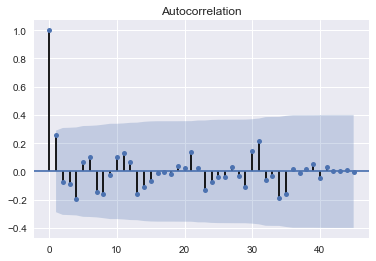

In [528]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(differenced)
pyplot.show()

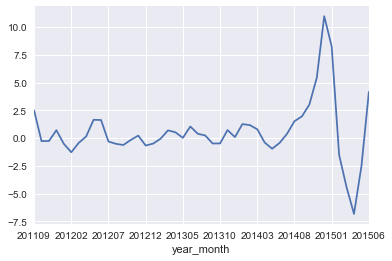

In [529]:
# usdrub Urals Lag
from pandas import Series
rub_1 = train.groupby('year_month')['usdrub'].mean()
# type(x)
differenced_1 = rub_1.diff(1)
# trim off the first year of empty data
differenced_1 = differenced_1[1:]
# plot differenced dataset
differenced_1.plot()


NameError: name 'pyplot' is not defined

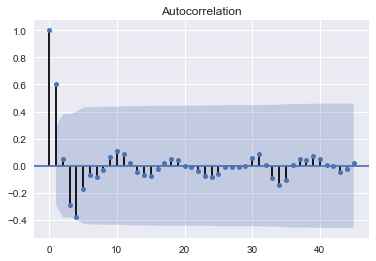

In [530]:
plot_acf(differenced_1)
pyplot.show()

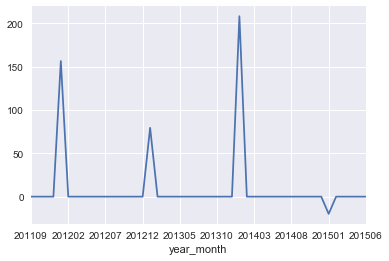

In [531]:
labor_force_1 = train.groupby('year_month')['labor_force'].mean()
# type(x)
differenced_2 = labor_force_1.diff(1)
# trim off the first year of empty data
differenced_2 = differenced_2[1:]
# plot differenced dataset
differenced_2.plot()


NameError: name 'pyplot' is not defined

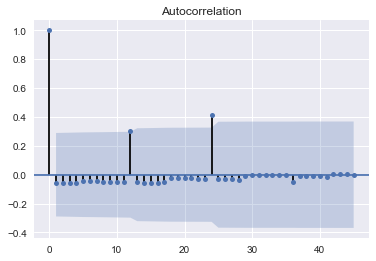

In [532]:
plot_acf(differenced_2)
pyplot.show()

In [533]:
# Merge these lagged variables with the train and test

x_1 = x_1.shift(1)
x_1 = x_1.to_frame().reset_index(level=0)
print x_1.head()
rub_1 = rub_1.shift(1)
rub_1 = rub_1.to_frame().reset_index(level=0)
print rub_1.head()
labor_force_1 = labor_force_1.shift(1)
labor_force_1 = labor_force_1.to_frame().reset_index(level=0)
print labor_force_1.head()



  year_month  oil_urals
0     201108        NaN
1     201109     109.31
2     201110     111.29
3     201111     108.24
4     201112     110.43
  year_month     usdrub
0     201108        NaN
1     201109  28.921833
2     201110  31.414226
3     201111  31.137589
4     201112  30.874150
  year_month  labor_force
0     201108          NaN
1     201109     6643.626
2     201110     6643.626
3     201111     6643.626
4     201112     6643.626


In [534]:
yrmth = pd.merge(x_1, rub_1, how = 'left', on = 'year_month')

In [535]:
yrmth = pd.merge(yrmth, labor_force_1, how = 'left', on = 'year_month')
yrmth

,year_month,oil_urals,usdrub,labor_force
0,201108,NaN,NaN,NaN
1,201109,109.3100,28.921833,6643.626000
2,201110,111.2900,31.414226,6643.626000
3,201111,108.2400,31.137589,6643.626000
4,201112,110.4300,30.874150,6643.626000
5,201201,107.9000,31.582145,6643.626000
6,201202,109.9100,31.058895,6799.974000
7,201203,119.0300,29.781092,6799.974000
8,201204,122.5200,29.344671,6799.974000
9,201205,117.8700,29.486540,6799.974000


In [537]:
# Same for test

oil_test = test.groupby('year_month')['oil_urals'].mean()
# type(x)
differenced = oil_test.diff(1)
# trim off the first year of empty data
differenced = differenced[1:]
# plot differenced dataset

rub_test = test.groupby('year_month')['usdrub'].mean()
# type(x)
differenced_t1 = rub_test.diff(1)
# trim off the first year of empty data
differenced_t1 = differenced_t1[1:]
# plot differenced dataset

labor_force_test = test.groupby('year_month')['labor_force'].mean()
# type(x)
differenced_t2 = labor_force_test.diff(1)
# trim off the first year of empty data
differenced_t2 = differenced_t2[1:]


In [538]:
# Make into dataframe
oil_test = oil_test.shift(1)
oil_test = oil_test.to_frame().reset_index(level=0)
print oil_test.head()

rub_test = rub_test.shift(1)
rub_test = rub_test.to_frame().reset_index(level=0)
print rub_test.head()

labor_force_test = labor_force_test.shift(1)
labor_force_test = labor_force_test.to_frame().reset_index(level=0)
print labor_force_test.head()

  year_month  oil_urals
0     201507        NaN
1     201508    55.8961
2     201509    45.5825
3     201510    47.0118
4     201511    47.3436
  year_month     usdrub
0     201507        NaN
1     201508  57.344665
2     201509  65.940505
3     201510  66.771039
4     201511  63.218105
  year_month  labor_force
0     201507          NaN
1     201508  7067.470079
2     201509  7067.470079
3     201510  7067.470079
4     201511  7067.470079


In [539]:
yrmth_test = pd.merge(oil_test, rub_test, how = 'left', on = 'year_month')

In [540]:
yrmth_test = pd.merge(yrmth_test, labor_force_test, how = 'left', on = 'year_month')
yrmth_test

,year_month,oil_urals,usdrub,labor_force
0,201507,NaN,NaN,NaN
1,201508,55.8961,57.344665,7067.470079
2,201509,45.5825,65.940505,7067.470079
3,201510,47.0118,66.771039,7067.470079
4,201511,47.3436,63.218105,7067.470079
5,201512,42.3962,65.303479,7067.470079
6,201601,36.7805,69.985064,7067.470079
7,201602,29.1125,78.125857,7067.470079
8,201603,30.5943,77.472250,7067.470079
9,201604,36.6171,69.734413,7067.470079


In [541]:
# Join with training and test
train = pd.merge(train, yrmth, how = 'left', on = 'year_month')
test = pd.merge(test, yrmth_test, how = 'left', on = 'year_month')

In [545]:
test.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,oil_urals_x,gdp_quart,cpi,ppi,usdrub_x,eurrub,gdp_annual,rts,micex,micex_cbi_tr,deposits_rate,mortgage_rate,income_per_cap,salary,labor_force_x,unemployment,employment,month,day,year,year_month,oil_urals_y,usdrub_y,labor_force_y
0,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,0.041116,13,13,0,0,1.258957,0.061485,1.205404,24.779082,6.620081,8.824060,0.225788,20.392427,0.514211,0,0,0,299166,19,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN
1,2015-07-01,79.2,1.0,8,17,1,0.0,3,1.0,1.0,1,103,0.007122,0,0,0,0,4.230425,0.000000,0.742377,21.722620,8.545593,3.654955,1.313180,13.445121,1.694967,0,0,1,231300,20,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN
2,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,0.225825,7,13,0,1,1.585306,0.580638,0.900408,10.320728,0.826743,3.290966,0.966254,1.464174,2.330995,6,0,2,1024431,179,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN
3,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,105,0.017647,0,0,0,0,7.931398,0.025446,0.466738,26.960463,9.434351,10.480798,4.480234,18.560234,0.403429,1,0,0,0,5,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN
4,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,1,103,0.007122,0,0,0,0,2.152792,0.427248,0.353642,21.905792,9.036942,3.729416,1.519553,13.898607,1.339078,0,0,1,201300,20,0,55.8961,19284.1,490.5,572.8,55.5989,61.5756,77945.1,930.66,1639.7,267.7,8.74,13.29,63194.0,64310.0,7067.470079,0.017708,0.733598,7,1,2015,201507,NaN,NaN,NaN


In [543]:
# Find change of lag (_y) vs current (_x)
train['delta_oil'] = (train['oil_urals_y'] - train['oil_urals_x']) / train['oil_urals_y']

In [544]:
train.loc[:,['year_month','oil_urals_x','oil_urals_y', 'delta_oil']]

,year_month,oil_urals_x,oil_urals_y,delta_oil
0,201108,109.3100,NaN,NaN
1,201108,109.3100,NaN,NaN
2,201108,109.3100,NaN,NaN
3,201109,111.2900,109.3100,-0.018114
4,201109,111.2900,109.3100,-0.018114
5,201109,111.2900,109.3100,-0.018114
6,201109,111.2900,109.3100,-0.018114
7,201109,111.2900,109.3100,-0.018114
8,201109,111.2900,109.3100,-0.018114
9,201109,111.2900,109.3100,-0.018114


In [546]:
train['delta_usdrub'] = (train['usdrub_y'] - train['usdrub_x']) / train['usdrub_y']
train.loc[:,['year_month','usdrub_x','usdrub_y', 'delta_usdrub']]

,year_month,usdrub_x,usdrub_y,delta_usdrub
0,201108,29.0048,NaN,NaN
1,201108,28.9525,NaN,NaN
2,201108,28.8082,NaN,NaN
3,201109,28.9655,28.921833,-0.001510
4,201109,29.4625,28.921833,-0.018694
5,201109,29.6676,28.921833,-0.025786
6,201109,29.6304,28.921833,-0.024499
7,201109,30.0495,28.921833,-0.038990
8,201109,30.0495,28.921833,-0.038990
9,201109,30.2323,28.921833,-0.045311


In [548]:
train['delta_labor_force'] = (train['labor_force_y'] - train['labor_force_x']) / train['labor_force_y']
train.loc[:,['year_month','labor_force_x','labor_force_y', 'delta_labor_force']]

nan


In [549]:
# Do same for test
test['delta_oil'] = (test['oil_urals_y'] - test['oil_urals_x']) / test['oil_urals_y']
test['delta_usdrub'] = (test['usdrub_y'] - test['usdrub_x']) / test['usdrub_y']
test['delta_labor_force'] = (test['labor_force_y'] - test['labor_force_x']) / test['labor_force_y']

In [564]:
train = train.fillna(0)

In [565]:
test = test.fillna(0)

In [ ]:
cols = range(3,48)

In [551]:
train.head()

,price_doc,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,oil_urals_x,gdp_quart,cpi,ppi,usdrub_x,eurrub,gdp_annual,rts,micex,micex_cbi_tr,deposits_rate,mortgage_rate,income_per_cap,salary,labor_force_x,unemployment,employment,month,day,year,year_month,oil_urals_y,usdrub_y,labor_force_y,delta_oil,delta_usdrub,delta_labor_force
0,5850000,2011-08-20,43,27.0,4.0,17.0,1.0,2014.0,2.0,1.0,2.0,0,9,0.000070,5,7,0,0,2.590241,0.600973,1.080934,15.156211,1.210027,4.308127,0.485841,8.148591,0.947962,14,0,2,4036616,152,0,109.31,14313.7,354.0,420.7,29.0048,41.7681,46308.5,1575.33,1438.74,204.78,4.1,11.84,42688.6,44898.7,6643.626,0.014,0.708,8,20,2011,201108,NaN,NaN,NaN,NaN,NaN,NaN
1,6000000,2011-08-23,34,19.0,3.0,17.0,1.0,2014.0,2.0,1.0,2.0,0,70,0.049637,8,6,1,0,0.936700,0.065321,0.966479,8.698054,2.724295,0.725560,0.668364,6.127073,1.072315,6,0,2,2034942,177,0,109.31,14313.7,354.0,420.7,28.9525,41.7537,46308.5,1578.91,1444.11,204.92,4.1,11.84,42688.6,44898.7,6643.626,0.014,0.708,8,23,2011,201108,NaN,NaN,NaN,NaN,NaN,NaN
2,5700000,2011-08-27,43,29.0,2.0,17.0,1.0,2014.0,2.0,1.0,2.0,0,129,0.118537,7,5,0,0,2.120999,0.453172,0.939275,9.067885,0.772216,3.562188,0.733101,0.767569,0.391957,4,0,1,1572990,122,0,109.31,14313.7,354.0,420.7,28.8082,41.7114,46308.5,1596.17,1458.84,204.84,4.1,11.84,42688.6,44898.7,6643.626,0.014,0.708,8,27,2011,201108,NaN,NaN,NaN,NaN,NaN,NaN
3,13100000,2011-09-01,89,50.0,9.0,17.0,1.0,2014.0,2.0,1.0,2.0,0,65,0.069753,10,17,0,0,1.489049,0.106125,0.451173,19.487005,6.348716,0.583025,0.623484,7.385521,0.892674,5,0,1,942180,61,1,111.29,14313.7,353.2,434.4,28.9655,41.4014,46308.5,1703.86,1551.58,205.42,4.0,11.92,40311.3,44898.7,6643.626,0.014,0.708,9,1,2011,201109,109.31,28.921833,6643.626,-0.018114,-0.001510,0.0
4,16331452,2011-09-05,77,77.0,4.0,17.0,1.0,2014.0,2.0,1.0,2.0,0,6,0.037316,9,25,0,0,1.257186,0.236214,0.392871,2.578671,1.638318,2.609420,0.220288,3.610754,0.810801,70,1,50,3503058,2283,17,111.29,14313.7,353.2,434.4,29.4625,41.5902,46308.5,1617.01,1492.83,198.24,4.0,11.92,40311.3,44898.7,6643.626,0.014,0.708,9,5,2011,201109,109.31,28.921833,6643.626,-0.018114,-0.018694,0.0


In [157]:
from sklearn.ensemble import RandomForestRegressor

y = np.log(train[[0]])
X = train.iloc[:,cols]
x_test = test.iloc[:,range(2,47)]
# print X
# Note I excluded timestamp

model = RandomForestRegressor(n_estimators=1000, oob_score=True)
# Train the model using the training sets and check score
model.fit(X, y.values.ravel())
#Predict Output
predicted= model.predict(x_test)

In [158]:
model 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [159]:
predicted

array([ 15.42647348,  15.93973138,  15.41362772, ...,  15.28820736,
        15.35302937,  15.69326541])

In [177]:
y.values.ravel()

array([[ 15.58195222],
       [ 15.60727003],
       [ 15.55597673],
       ..., 
       [ 15.75726336],
       [ 16.41820024],
       [ 15.53827716]])

In [226]:
from sklearn.metrics import roc_auc_score
#oob_error = 1 - model.oob_score_
#print model.oob_prediction_
model.score(X, y)
#print "AUC - ROC : ", roc_auc_score(y.values, model.score(X,y))

0.91947790677107699

In [197]:
model.oob_prediction_.ravel()

array([ 15.05163269,  15.28252716,  15.05533442, ...,  15.67588046,
        16.08887661,  15.41628237])

In [199]:
y.values.ravel()

array([ 15.58195222,  15.60727003,  15.55597673, ...,  15.75726336,
        16.41820024,  15.53827716])

In [202]:
model.feature_importances_ 

array([  2.62758676e-01,   1.65278970e-02,   2.01717486e-02,
         8.92150567e-03,   3.73394772e-03,   1.52436158e-02,
         5.15246661e-03,   9.14197140e-03,   3.72392928e-03,
         1.69147530e-02,   1.50800639e-02,   9.83328943e-03,
         1.27749288e-02,   1.85722051e-03,   2.35775635e-04,
         5.30931592e-02,   2.96547582e-02,   2.97806853e-02,
         2.86381026e-02,   2.98319919e-02,   2.85067006e-02,
         3.19390329e-02,   3.25747988e-02,   1.94285523e-02,
         2.77196232e-03,   2.24614277e-02,   2.96520722e-02,
         7.12402643e-02,   1.77332757e-02,   6.25288561e-03,
         1.08274126e-02,   1.22799099e-02,   1.94272646e-02,
         2.06692019e-02,   7.74621628e-04,   1.83344134e-02,
         2.18939779e-02,   2.54599811e-02,   8.78660942e-03,
         1.08404785e-02,   1.10520214e-02,   7.84177289e-04,
         9.12023869e-04,   1.39064686e-03,   9.35800709e-04])

Feature ranking:
1. feature 0 (0.262759)
2. feature 27 (0.071240)
3. feature 15 (0.053093)
4. feature 22 (0.032575)
5. feature 21 (0.031939)
6. feature 19 (0.029832)
7. feature 17 (0.029781)
8. feature 16 (0.029655)
9. feature 26 (0.029652)
10. feature 18 (0.028638)
11. feature 20 (0.028507)
12. feature 37 (0.025460)
13. feature 25 (0.022461)
14. feature 36 (0.021894)
15. feature 33 (0.020669)
16. feature 2 (0.020172)
17. feature 23 (0.019429)
18. feature 32 (0.019427)
19. feature 35 (0.018334)
20. feature 28 (0.017733)
21. feature 9 (0.016915)
22. feature 1 (0.016528)
23. feature 5 (0.015244)
24. feature 10 (0.015080)
25. feature 12 (0.012775)
26. feature 31 (0.012280)
27. feature 40 (0.011052)
28. feature 39 (0.010840)
29. feature 30 (0.010827)
30. feature 11 (0.009833)
31. feature 7 (0.009142)
32. feature 3 (0.008922)
33. feature 38 (0.008787)
34. feature 29 (0.006253)
35. feature 6 (0.005152)
36. feature 4 (0.003734)
37. feature 8 (0.003724)
38. feature 24 (0.002772)
39. feature 13

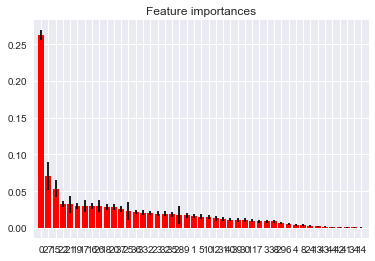

In [206]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [211]:
X.iloc[:,27]

0         152
1         177
2         122
3          61
4        2283
5         567
6         635
7         143
8         292
9         143
10         38
11        136
12        101
13       1615
14        803
15        118
16        116
17        294
18         34
19        118
20          2
21        225
22        163
23        118
24        160
25        167
26        225
27         22
28        209
29        143
         ... 
30441    2625
30442      18
30443      52
30444      92
30445     606
30446      21
30447      52
30448      14
30449     606
30450     229
30451       0
30452     194
30453      26
30454     198
30455      20
30456      99
30457      60
30458     100
30459      52
30460     113
30461     359
30462     606
30463     150
30464     226
30465    2625
30466     207
30467    2197
30468      20
30469     230
30470      93
Name: cafe_count_5000, dtype: int64

In [225]:
print list(X)[0]
print list(X)[27]
print list(X)[15]
print list(X)[22]
print list(X)[21]
print list(X)[19]
print list(X)[17]
print list(X)[16]
print list(X)[26]
print list(X)[18]
print list(X)[20]
print list(X)[37]

full_sq
cafe_count_5000
metro_min_avto
additional_education_km
stadium_km
ts_km
kremlin_km
green_zone_km
trc_sqm_5000
radiation_km
fitness_km
micex_cbi_tr


# Another model with different predictors


In [571]:
X2 = train.loc[:, ['month','year', 'day','year_month','num_room','kremlin_km','cafe_count_5000',
                    'metro_min_avto','additional_education_km','build_year','oil_urals_y', 'industrial_km',
                   'state','usdrub_y', 'labor_force_y','delta_oil', 'delta_usdrub','delta_labor_force']]


y2 = np.log(train[[0]])
x2_test = test.loc[:, ['month','year', 'day','year_month','num_room','kremlin_km','cafe_count_5000',
                    'metro_min_avto','additional_education_km','build_year','oil_urals_y', 'industrial_km',
                   'state','usdrub_y', 'labor_force_y','delta_oil', 'delta_usdrub','delta_labor_force']]


model2 = RandomForestRegressor(n_estimators=1000, oob_score=True, verbose = 1)
# Train the model using the training sets and check score
model2.fit(X2, y2.values.ravel())
#Predict Output
#predicted2 = model2.predict(x2_test)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  4.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
           verbose=1, warm_start=False)

In [570]:
model2.fit(X2, y2.values.ravel())

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  4.5min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
           verbose=1, warm_start=False)

In [573]:
model2.score(X2, y2)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.3s finished


0.90381153906612721

In [574]:
importances2 = model2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model2.estimators_],
             axis=0)
indices = np.argsort(importances2)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances2[indices[f]]))

Feature ranking:
1. feature 6 (0.135221)
2. feature 4 (0.126602)
3. feature 7 (0.121477)
4. feature 11 (0.098670)
5. feature 5 (0.096105)
6. feature 8 (0.090466)
7. feature 9 (0.063519)
8. feature 16 (0.062655)
9. feature 2 (0.055099)
10. feature 3 (0.038561)
11. feature 13 (0.023131)
12. feature 15 (0.022198)
13. feature 10 (0.020796)
14. feature 0 (0.018650)
15. feature 12 (0.017229)
16. feature 14 (0.003778)
17. feature 1 (0.003247)
18. feature 17 (0.002596)


IndexError: index 18 is out of bounds for axis 0 with size 18

In [575]:
predicted2 = model2.predict(x2_test)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.1s finished


In [602]:
type(predicted2)

numpy.ndarray

In [609]:
predicted2

array([ 15.31975954,  15.60070662,  15.39248143, ...,  15.37523885,
        15.4102165 ,  15.78157137])

In [619]:
len(predicted2)

7662

In [608]:
submission = pd.read_csv("/Users/andrewrubino/Desktop/test.csv", parse_dates = ['timestamp'])

In [618]:
submission.head()
print len(submission)

7662


In [620]:
submission['index1'] = submission.index
submission.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [621]:
predicted_price = pd.DataFrame(predicted2)

In [622]:
predicted_price['index1'] = predicted_price.index
predicted_price.head()

,0,index1
0,15.319760,0
1,15.600707,1
2,15.392481,2
3,15.590494,3
4,15.471753,4


In [624]:
predicted_price.columns = ['price_doc', 'index1']
predicted_price.head()

,price_doc,index1
0,15.319760,0
1,15.600707,1
2,15.392481,2
3,15.590494,3
4,15.471753,4


In [625]:
submission = pd.merge(submission, predicted_price, how = 'left', on = 'index1')

In [637]:
submission.head()

,price_doc
id,
30474,4.500772e+06
30475,5.960749e+06
30476,4.840272e+06
30477,5.900183e+06
30478,5.239585e+06


In [628]:
submission = submission.loc[:,['id','price_doc']]

In [636]:
submission['price_doc'] = np.exp(submission['price_doc'])

In [630]:
submission.set_index('id', inplace=True)

In [638]:
submission.to_csv("rf2_submission.csv")